In [130]:
# Useful starting lines
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from preprocessing import *
from plots import *
from crossval import *
from stochlogreg import *
from split_data import *
from classification_accuracy import *
from helpers import *
%load_ext autoreload
%autoreload 2
from implementations import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [59]:
from helpers import *
DATA_TRAIN_PATH = 'C:/Users/joeld/Desktop/EPFL/machine learning/AIAIaie/data/train.csv' # TODO: download train data and supply path here 
#DATA_TRAIN_PATH = '/Users/benoithohl/Desktop/epfl/master_epfl/Ma3/Machine_learning/AIAIaie/data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [60]:
data = pd.read_csv(DATA_TRAIN_PATH)
pd.set_option('display.max_columns', 50)
data.head(12)

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.000,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.000,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.000,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.000,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,138.178,0.365,-1.305,-999.000,78.800,0.654,1.547,28.740,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,65.333,0.675,-1.366,-999.000,39.008,2.433,-2.532,26.325,0.210,1.884,37.791,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,255.123,0.599,0.538,-999.000,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [61]:
print("shape of data tX: ",tX.shape)
print("**")
print(len(tX[:,1]))

print(tX[0:30,0])
print("**")

shape of data tX:  (250000, 30)
**
250000
[ 138.47   160.937 -999.     143.905  175.864   89.744  148.754  154.916
  105.594  128.053 -999.     114.744  145.297   82.488 -999.     111.026
  114.256  127.861 -999.    -999.    -999.      90.736   87.075  141.481
  110.785   76.883  137.197  111.271  118.104   98.761]
**


# PREPROCESSING

In [105]:
y[np.nonzero(y == -1)] = 0
Data = remove_features_with_too_many_missing_values(tX,0.66)
Data = replace_missing_values_with_global_mean(Data)
ZData = Z_score_of_each_feature(Data)

trainx,trainy,validationx,validationy = split_data(ZData, y, 0.75, seed=1)
#trainy = np.transpose(np.array(trainy,ndmin=2))

trainx = np.delete(trainx, [3,6,22], axis=1)
validationx = np.delete(validationx, [3,6,22], axis=1)
trainyas = np.transpose(np.array(trainy,ndmin=2))

7 features removed (features number:  [ 4  5  6 12 26 27 28] )
new shape of data: (250000, 23)


In [22]:
#Visualization
Data_df = pd.DataFrame(ZData)
Data_df.head(12)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,3.149107e-01,0.068332,0.407680,-0.469966,0.882478,1.033099,0.339894,0.170929,1.277084,-0.270811,0.846712,0.214212,0.225054,1.812288,-1.352820,-0.756757,-0.147267,0.386847,1.044402,-0.369921,1.557298e+00,3.248244e-01,0.412510
1,7.408270e-01,0.552505,0.540136,-0.153167,1.404888,-0.756027,-0.287584,-0.661279,1.292164,0.147536,1.688504,-1.652849,-0.441526,0.411475,0.032730,0.090798,-1.051683,-0.357719,0.021305,-0.821154,5.267049e-01,8.329932e-01,-0.273820
2,-5.388023e-16,3.195156,1.096560,-0.349710,0.989770,-0.430168,0.340361,2.768174,1.292164,-0.292406,-0.571650,-1.147554,3.387682,-0.737951,0.555132,0.382001,-1.200672,0.400135,0.021305,-0.863173,1.487145e+00,-1.434550e+00,-0.293970
3,4.179442e-01,0.910379,-0.005853,-0.903016,1.196690,-0.830735,-0.712705,1.084818,-0.969095,-0.716598,-1.354138,0.010002,0.301873,-0.397234,-1.730447,-0.323312,0.038692,-0.978149,-1.001792,0.000000,1.003673e-17,1.111175e-17,-0.745439
4,1.023804e+00,-0.914556,1.313369,-0.651804,1.938794,-0.112795,-0.868143,-0.451747,-1.052877,-0.468428,-1.800568,-1.223513,-0.765298,0.646261,0.839728,-1.185429,-0.475042,-1.238475,-1.001792,0.000000,1.003673e-17,1.111175e-17,-0.745439
5,-6.088086e-01,-1.009761,-0.539646,0.918192,-1.291464,1.917156,1.040948,-1.005763,0.508808,0.666766,0.314620,0.736020,-0.684128,-0.683404,0.998266,-0.029860,1.239982,0.577488,2.067499,0.121800,-1.742045e+00,-4.559336e-01,1.230371
6,5.098688e-01,-0.576543,0.651504,0.757735,0.725371,-0.735060,1.275085,2.288737,1.274570,-0.439827,0.925785,1.330485,2.292321,0.549027,-0.555730,-0.100206,-0.790677,0.666224,1.044402,0.812469,6.272329e-01,1.040816e+00,1.089751
7,6.266844e-01,-1.098374,0.331435,-0.451288,0.669171,-0.780810,-0.175049,-1.269749,-0.985852,1.788886,0.547719,0.856014,-0.812160,0.415428,-0.765461,-0.591046,-0.966153,-0.177852,0.021305,-1.152798,-5.147361e-01,-1.218187e+00,-0.432856
8,-3.083335e-01,0.037323,0.485126,-0.842157,0.678112,-0.656806,-0.804620,-0.902773,-1.036958,0.013412,2.013031,-1.389193,-0.921610,0.181432,1.013129,-0.119358,0.018827,-0.632361,-1.001792,0.000000,1.003673e-17,1.111175e-17,-0.745439
9,1.174312e-01,1.123253,-0.291707,2.128582,-0.975975,0.446346,0.835660,-0.992741,0.558239,0.711162,-1.253650,0.233477,-0.630786,-0.235176,-0.374073,2.765216,0.471863,0.671497,0.021305,1.764019,-1.998790e+00,-1.780446e+00,0.965872


## Do your crazy machine learning thing here :) ...

## data visualization

In [ ]:
signaldata = ZData[np.nonzero(y == 1)]
nosignaldata = ZData[np.nonzero(y == -1)]

In [120]:
for i in range(ZData.shape[1]):
    plt.figure
    plt.hist(signaldata[:,i],100,color='b')
    plt.hist(nosignaldata[:,i],100,color='r')
    plt.show()

NameError: name 'signaldata' is not defined

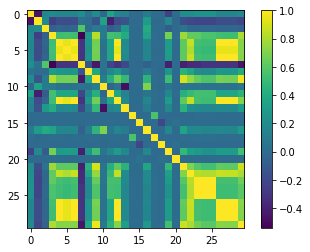

In [56]:
cov = np.corrcoef(np.transpose(tX))
plt.imshow(cov)
plt.colorbar()

## modeling

In [235]:
degree = 3
lambdas = [0]
method = 'penalized'
validationy[np.nonzero(validationy == 0)] = -1

tx = build_poly(trainx, degree)
validationtx = build_poly(validationx, degree)

weight = np.zeros(tx.shape[1])
accuracy = np.zeros(len(lambdas))

for ind, lambda_ in enumerate(lambdas):
    loss, w = running_gradient(trainyas, tx, lambda_, method)
    np.append(weight,w)
    predictions = predict_labels(w, validationtx)
    accuracy[ind] = calculate_classification_accuracy(validationy,predictions)
    
weights = w

#plt.plot(lambdas,accuracy)
print(accuracy)

Current iteration=0, loss=0.6931471805599453
Current iteration=100, loss=0.6803475817998539
Current iteration=200, loss=0.6810763570309702
Current iteration=300, loss=0.7064916609617319
Current iteration=400, loss=0.5642065568984562
Current iteration=500, loss=0.6783771661937044
Current iteration=600, loss=0.6355543015087344
Current iteration=700, loss=0.6368506049112387
Current iteration=800, loss=0.5959076385252092
Current iteration=900, loss=0.6817546205642259
Current iteration=1000, loss=0.5859536602665699
Current iteration=1100, loss=0.6111294766498331
Current iteration=1200, loss=2.435868054025379
Current iteration=1300, loss=0.6048186819281584
Current iteration=1400, loss=0.6658177530486591
Current iteration=1500, loss=0.4029822142870497
Current iteration=1600, loss=0.6750275133824053
Current iteration=1700, loss=0.5752353859742861
Current iteration=1800, loss=0.6751671724533531
Current iteration=1900, loss=0.806110195587542
Current iteration=2000, loss=0.5571508200568881
Curren

In [60]:
predictions = predict_labels(w, validationtx)

accuracy = calculate_classification_accuracy(validationy,predictions)
print(accuracy)

0.782224


## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'C:/Users/joeld/Desktop/EPFL/machine learning/AIAIaie/data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
Data_test = remove_features_with_too_many_missing_values(tX_test,0.66)
Data_test = replace_missing_values_with_global_mean(Data_test)
ZData_test = Z_score_of_each_feature(Data_test)

In [ ]:
OUTPUT_PATH = 'C:/Users/joeld/Desktop/EPFL/machine learning/AIAIaie/data/output.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, ZData_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

# test implementations.py

In [131]:
degree = 1
lambda_ = 0.01

validationy[np.nonzero(validationy == 0)] = -1
max_iters = 1000
gamma = 1e-4

tx = build_poly(trainx, degree)
validationtx = build_poly(validationx, degree)

initial_w = np.zeros((tx.shape[1], 1))

w, loss = reg_logistic_regression(trainyas, tx, lambda_ , initial_w, max_iters, gamma)

print(w)
predictions = predict_labels(w, validationtx)
accuracy = calculate_classification_accuracy(validationy,predictions)
    

print(accuracy)

Current iteration=0, loss=0.6931471805599453


KeyboardInterrupt: 